In [34]:
import pyquil.forest as forest
import matplotlib.pyplot as plt
import json

In [104]:
qpu = forest.QPUConnection("Z12-13-C4a2")
print qpu.endpoint

https://dev.rigetti.com/Beta


In [101]:
version_query = qpu.version()

posting {'machine': 'QPU', 'program': {'experiment': 'version_query', 'type': 'pyquillow'}, 'userId': '3154a2d2-24bd-43bd-873f-f565255dac42', 'results': '', 'jobId': ''}


In [102]:
qpu.get_job(version_query).result # if we check immediately we see that it is submitted, but not processed

{u'jobId': u'BMUAKUVPYC', u'status': u'SUBMITTED'}

In [103]:
qpu.get_job(version_query).result # the result shows what device is available

{u'jobId': u'BMUAKUVPYC', u'result': u"{'device_id': 'Z12-13-C4a2'}"}

In [49]:
ramsey_res = qpu.ramsey(qubit_id=3, start=0.01, stop=10, step=0.2, detuning=0.5)

posting {'machine': 'QPU', 'program': {'qcid': 3, 'stop': 10, 'detuning': 0.5, 'start': 0.01, 'step': 0.2, 'experiment': 'ramsey', 'type': 'pyquillow'}, 'userId': '3154a2d2-24bd-43bd-873f-f565255dac42', 'results': '', 'jobId': ''}


In [57]:
rabi_res = qpu.rabi(qubit_id=3, start=0.01, stop=0.33, step=0.03, the_time=160)

posting {'machine': 'QPU', 'program': {'qcid': 3, 'stop': 0.33, 'start': 0.01, 'step': 0.03, 'experiment': 'rabi', 'time': 160, 'type': 'pyquillow'}, 'userId': '3154a2d2-24bd-43bd-873f-f565255dac42', 'results': '', 'jobId': ''}


In [51]:
t1_res = qpu.t1(qubit_id=3, start=0.01, stop=60.0, num_pts=31)

posting {'machine': 'QPU', 'program': {'qcid': 3, 'stop': 60.0, 'start': 0.01, 'experiment': 't1', 'type': 'pyquillow', 'num_pts': 31}, 'userId': '3154a2d2-24bd-43bd-873f-f565255dac42', 'results': '', 'jobId': ''}


In [58]:
qpu.get_job(ramsey_res).result

{u'jobId': u'SNJVOOIRCJ', u'status': u'RUNNING'}

In [59]:
def plot_data(data):
    xs = [rr[0] for rr in data]
    amps = [rr[1] for rr in data]
    plt.plot(xs, amps)
    plt.show()

In [61]:
ramsey_data = json.loads(qpu.get_job(ramsey_res).result['result'])

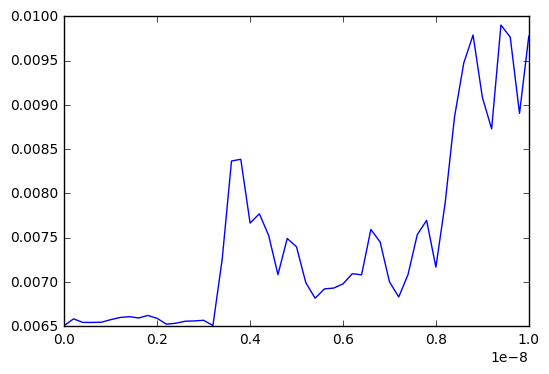

In [62]:
plot_data(ramsey_data) # note that this data looks junky due to physics... the other expts are fine

In [72]:
rabi_data = json.loads(qpu.get_job(rabi_res).result['result'])

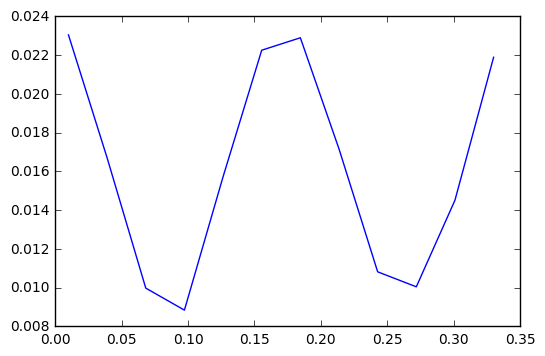

In [73]:
plot_data(rabi_data)

In [70]:
t1_data = json.loads(qpu.get_job(t1_res).result['result'])

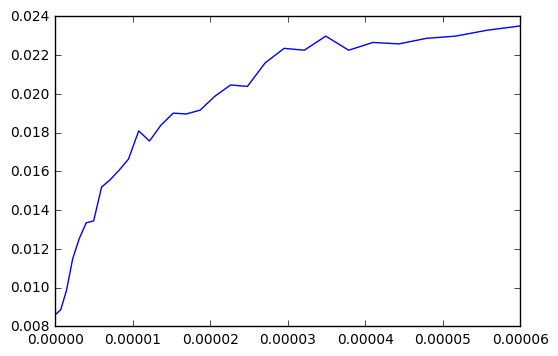

In [71]:
plot_data(t1_data)